In [1]:
import hp4155a 
import matplotlib.pyplot as plt

In [2]:
device = hp4155a.HP4155a('GPIB0::17::INSTR')
device.reset()
device.disable_not_smu()

In [3]:
smu1 = device.smu_dict()
smu1.update(vname ='VS1',iname = 'IS1',mode = 'COMM',func='CONS')

smu2 = device.smu_dict()
smu2.update(vname ='VDS',iname ='ID',mode='V',func='CONS')

smu3 = device.smu_dict()
smu3.update(vname='VGS',iname ='IG',mode='V',func='VAR1')

smu4 = device.smu_dict()
smu4.update(vname ='VS2',iname = 'IS2',mode = 'COMM',func='CONS')

In [4]:
smus=[smu1,smu2,smu3,smu4]
print(smus)

[{'vname': 'VS1', 'iname': 'IS1', 'mode': 'COMM', 'func': 'CONS'}, {'vname': 'VDS', 'iname': 'ID', 'mode': 'V', 'func': 'CONS'}, {'vname': 'VGS', 'iname': 'IG', 'mode': 'V', 'func': 'VAR1'}, {'vname': 'VS2', 'iname': 'IS2', 'mode': 'COMM', 'func': 'CONS'}]


In [5]:
for i in range(4):
    device.setup_smu(i+1,smus[i])

In [6]:
var1 = device.var1_dict()
var1.update(mode='SING',start=2,stop=-8,step=-0.05,comp = 10e-3,pcomp=0)
smu3.update(var1=var1)
print(smu3)

{'vname': 'VGS', 'iname': 'IG', 'mode': 'V', 'func': 'VAR1', 'var1': {'mode': 'SING', 'start': 2, 'stop': -8, 'step': -0.05, 'comp': 0.01, 'pcomp': 0}}


In [7]:
device.setup_var1(var1)

In [8]:
cons_smu2=device.cons_smu_dict()
cons_smu2.update(value=10,comp=0.1)

In [9]:
device.setup_cons_smu(2,cons_smu2)

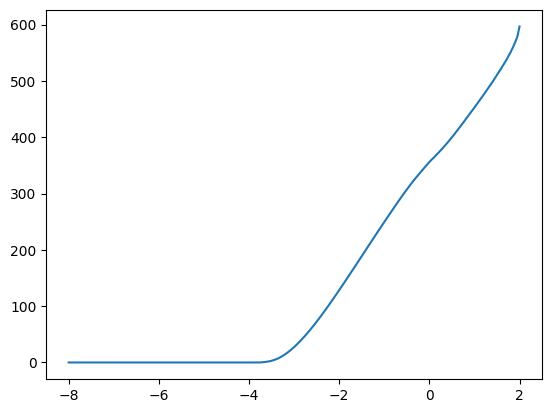

In [10]:
device.integration_time('MED')
device.user_function('Gm','mS/mm','1E4*DIFF(ID,VGS)')
device.user_function('IDmm','mA/mm','1E4*ID')
device.user_function('IGmm','mA/mm','1E4*IG')
    
    
#display
device.display_variable('X','VGS')
device.display_variable('Y1','IDmm')
device.display_variable('Y2','IGmm')

device.single_measurement()
device.wait()

device.autoscaling()
Idmm = device.return_values('IDmm')
Vgs = device.return_values('VGS')

plt.plot(Vgs,Idmm)
plt.show()